### 데이터 시각화 및 분석하기

#### 범주형 데이터 분석

In [65]:
import pymysql
import pandas as pd

db_conf = {
    "host": "127.0.0.1",
    "user": "test",
    "password": "test11",
    "database": "finance",
}

con = pymysql.connect(**db_conf)
apt_sale = pd.read_sql("SELECT * FROM APT_SALE WHERE YM>=201910 AND YM<=201912", con)
con.close()

In [66]:
import seaborn as sns

In [67]:
import tat

In [68]:
import numpy as np

apt_sale.columns=["매매가격","건축년도","년","월","일","동","아파트명","크기","지번","코드","층","년월","id","시간"]
label = ["10평미만", "10평대","20평대", "30평대", "40평대", "50평대", "60평대", "60평대 이상"]
apt_sale["평수"] = apt_sale["크기"]/3.3
apt_sale["평수구분"] = pd.cut(apt_sale["평수"], [0,10, 20, 30,40,50, 60,70,np.Inf], labels=label)

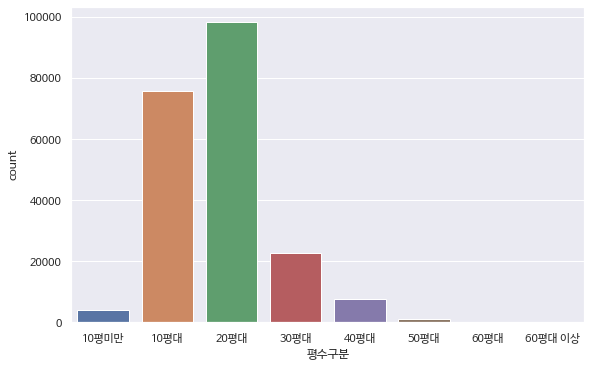

In [69]:
sns.countplot(apt_sale["평수구분"])

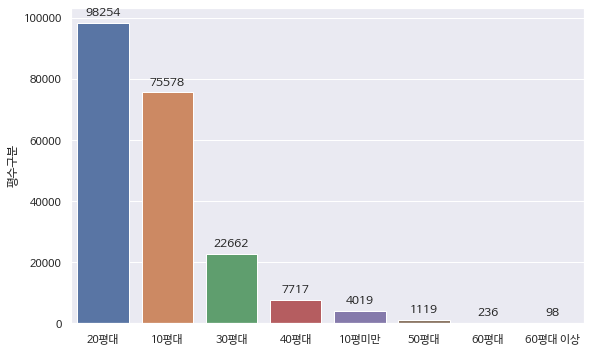

In [70]:
tat.countplot(apt_sale["평수구분"])

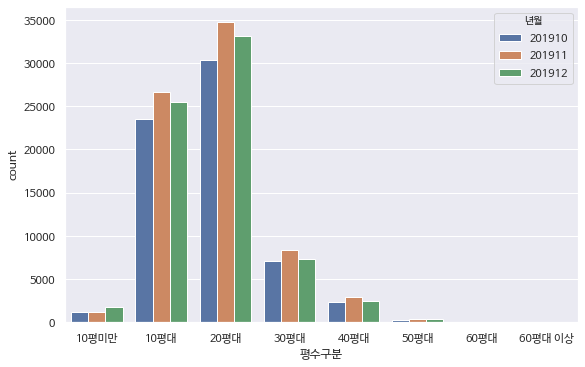

In [71]:
sns.countplot(apt_sale["평수구분"], hue=apt_sale["년월"])

#### 수치형 데이터 분석

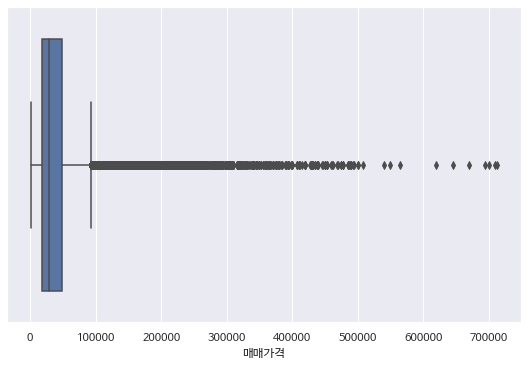

In [72]:
sns.boxplot(apt_sale["매매가격"])

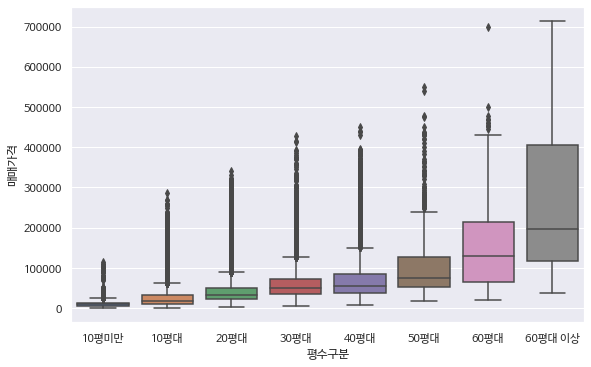

In [73]:
sns.boxplot(y="매매가격",x="평수구분", data=apt_sale)

In [74]:
ji_code = pd.read_excel("./data/KIKcd_B.20181210.xlsx")
ji_code["코드"] = ji_code["법정동코드"].astype(str).str[0:5]
ji_code_nodup = ji_code[["코드","시도명"]].drop_duplicates()
apt_sale = pd.merge(apt_sale, ji_code_nodup, on="코드", how="left")

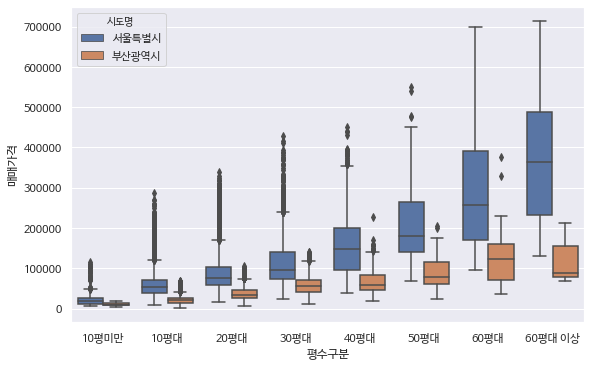

In [75]:
apt_sale_1 = apt_sale[apt_sale["시도명"].isin(["서울특별시","부산광역시"])]
sns.boxplot(y="매매가격",x="평수구분", hue="시도명", data=apt_sale_1)

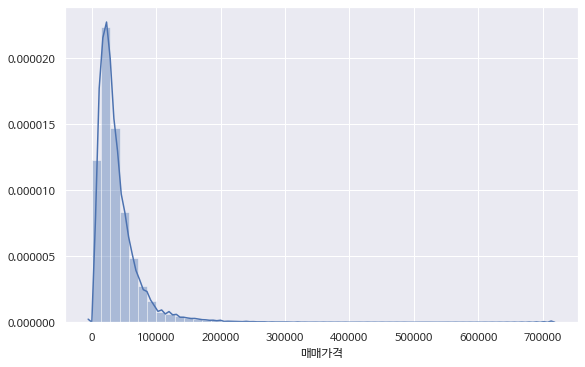

In [76]:
sns.distplot(apt_sale["매매가격"])

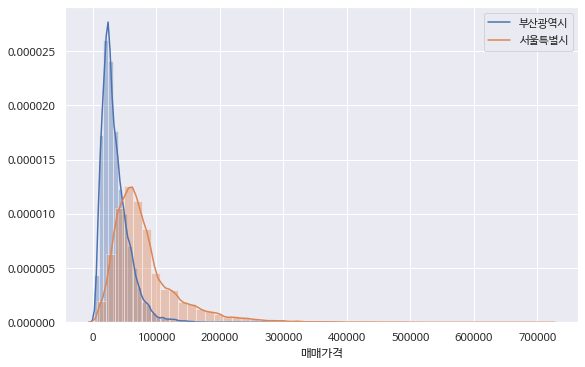

In [77]:
apt_sale_gr = apt_sale_1.groupby("시도명")
for d in apt_sale_gr:
    sns.distplot(d[1]["매매가격"], kde_kws={"label":d[1]["시도명"].max()})

#### 시계열 데이터 분석

In [78]:
import pymysql
import pandas as pd

db_conf = {
    "host": "127.0.0.1",
    "user": "test",
    "password": "test11",
    "database": "finance",
}

con = pymysql.connect(**db_conf)
stock_df = pd.read_sql("SELECT * FROM STOCK_DATA WHERE SYMBOL IN ('005930','009150')", con)
con.close()

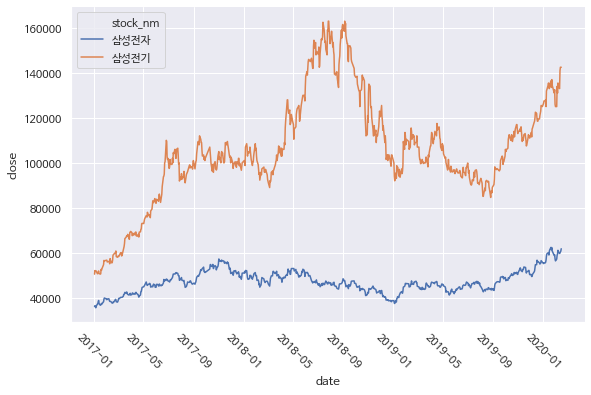

In [79]:
stock_df["date"] = stock_df["date"].astype("datetime64")
stock_df["stock_nm"]="삼성전기"
stock_df.loc[stock_df["symbol"]=="005930", "stock_nm"]="삼성전자"
tat.xticks()
sns.lineplot(x="date",y="close", hue="stock_nm", data=stock_df)

####  변수간 관계 파악하기

##### 범주형 vs 범주형

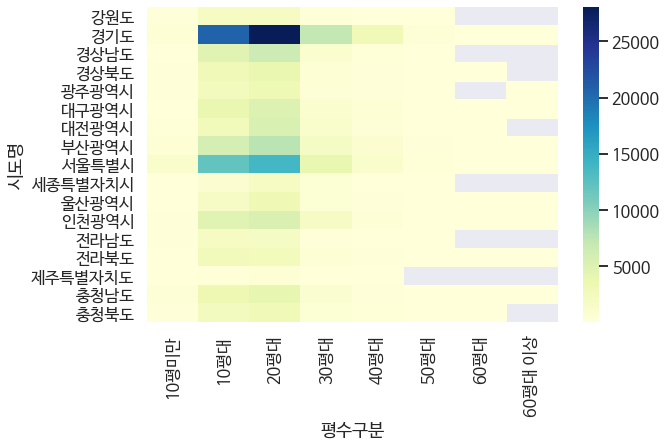

In [43]:
apt_sale_gr=apt_sale.groupby(["시도명", "평수구분"]).size()
apt_sale_ht = apt_sale_gr.unstack(-1)
sns.heatmap(apt_sale_ht,  cmap="YlGnBu")

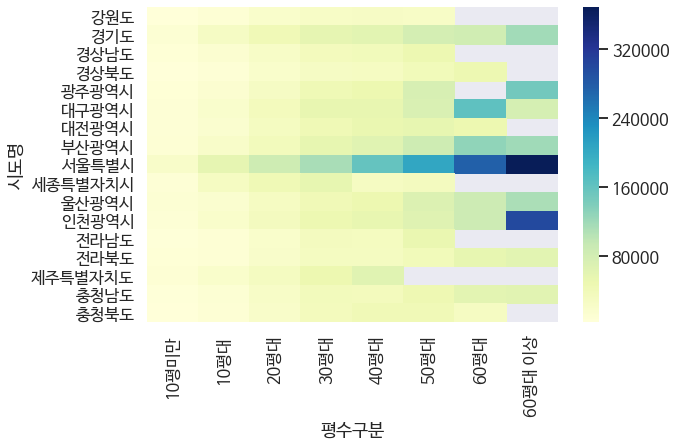

In [45]:
apt_sale_gr=apt_sale.groupby(["시도명", "평수구분"])["매매가격"].mean()
apt_sale_ht = apt_sale_gr.unstack(-1)
sns.heatmap(apt_sale_ht,  cmap="YlGnBu")

##### 수치형 vs 수치형

In [26]:
import pymysql
import pandas as pd

db_conf = {
    "host": "127.0.0.1",
    "user": "test",
    "password": "test11",
    "database": "finance",
}

con = pymysql.connect(**db_conf)
apt_sale = pd.read_sql("SELECT * FROM APT_SALE WHERE YM=201912", con)
con.close()

In [27]:
import seaborn as sns
import tat

In [28]:
apt_sale.columns=["매매가격","건축년도","년","월","일","동","아파트명","크기","지번","코드","층","년월","id","시간"]

In [29]:
import numpy as np
label = ["10평미만", "10평대","20평대", "30평대", "40평대", "50평대", "60평대", "60평대 이상"]
apt_sale["평수"] = apt_sale["크기"]/3.3
apt_sale["평수구분"] = pd.cut(apt_sale["평수"], [0,10, 20, 30,40,50, 60,70,np.Inf], labels=label)

In [30]:
ji_code = pd.read_excel("./data/KIKcd_B.20181210.xlsx")
ji_code["코드"] = ji_code["법정동코드"].astype(str).str[0:5]
ji_code_nodup = ji_code[["코드","시도명"]].drop_duplicates()
apt_sale = pd.merge(apt_sale, ji_code_nodup, on="코드", how="left")

In [31]:
apt_sale.head()

,매매가격,건축년도,년,월,일,동,아파트명,크기,지번,코드,층,년월,id,시간,평수,평수구분,시도명
0,94000,2007,2019,12,26,필운동,신동아블루아광화문의 꿈,107.50,254,11110,7,201912,1,2020-03-07 23:46:09,32.575758,30평대,서울특별시
1,125000,2008,2019,12,3,사직동,광화문풍림스페이스본(101동~105동),126.34,9,11110,4,201912,2,2020-03-07 23:46:09,38.284848,30평대,서울특별시
2,159000,2008,2019,12,16,사직동,광화문풍림스페이스본(106동),153.42,9-1,11110,11,201912,3,2020-03-07 23:46:09,46.490909,40평대,서울특별시
3,130000,2008,2019,12,18,사직동,광화문풍림스페이스본(101동~105동),108.55,9,11110,5,201912,4,2020-03-07 23:46:09,32.893939,30평대,서울특별시
4,155000,2008,2019,12,23,사직동,광화문풍림스페이스본(101동~105동),159.01,9,11110,9,201912,5,2020-03-07 23:46:09,48.184848,40평대,서울특별시


In [32]:
apt_sale_gr = apt_sale.groupby(["시도명", "동", "지번" ,"아파트명"]).agg({"건축년도":"mean","평수":"mean", "매매가격":"mean"})
apt_sale_gr = apt_sale_gr.reset_index(drop=False)

In [33]:
apt_sale_gr.head()

,시도명,동,지번,아파트명,건축년도,평수,매매가격
0,강원도,개운동,322,개운현대,1998.0,18.195455,8700.0
1,강원도,개운동,433-9,원흥아파트1단지,1990.0,19.583030,5500.0
2,강원도,개운동,441,개운한신휴플러스1차,2006.0,25.730303,20350.0
3,강원도,개운동,546-3,서초,1999.0,14.216667,5800.0
4,강원도,개운동,581-1,원주개운휴먼시아1단지,2010.0,28.912121,23100.0


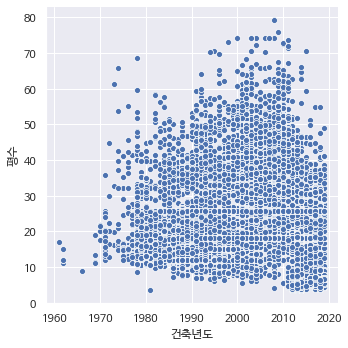

In [34]:
sns.relplot("건축년도", "평수", data=apt_sale)

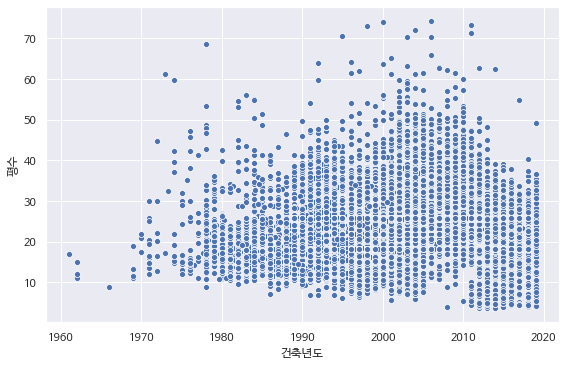

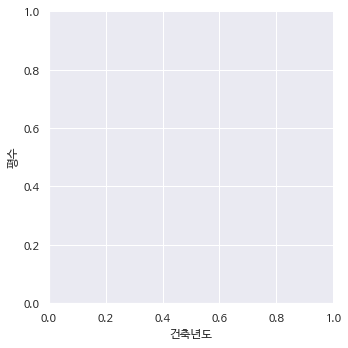

In [35]:
tat.relplot("건축년도", "평수", data=apt_sale_gr)

/Users/open/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/open/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


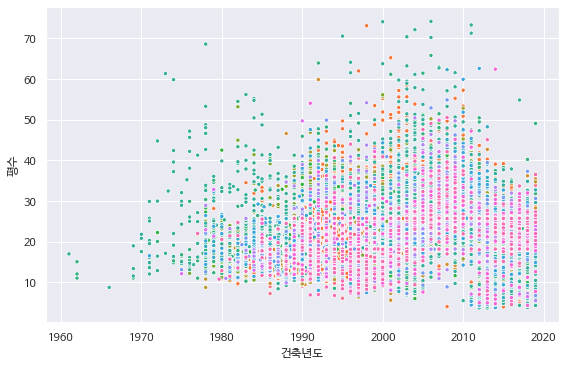

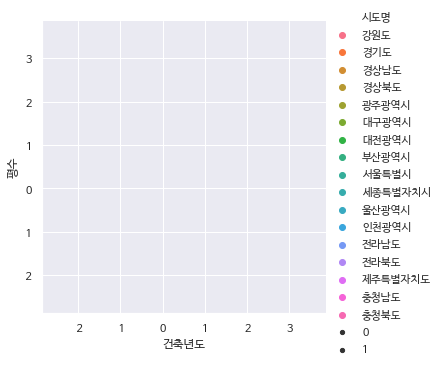

In [36]:
tat.relplot("건축년도", "평수", hue="시도명", size=1 , data=apt_sale_gr)

In [37]:
import numpy as np
label = ["10평미만", "10평대","20평대", "30평대", "40평대", "50평대", "60평대", "60평대 이상"]
apt_sale_gr["평수구분"] = pd.cut(apt_sale_gr["평수"], [0,10, 20, 30,40,50, 60,70,np.Inf], labels=label)

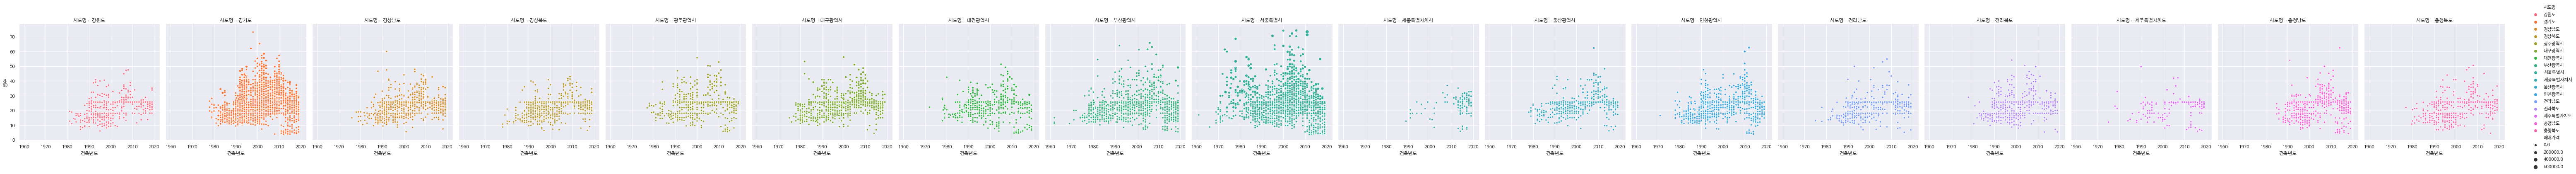

In [38]:
sns.relplot("건축년도", "평수", hue="시도명", col="시도명", size="매매가격" , data=apt_sale_gr)

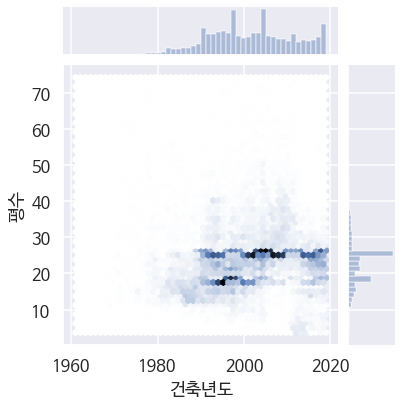

In [94]:
sns.jointplot("건축년도", "평수", kind="hex" , data=apt_sale_gr)

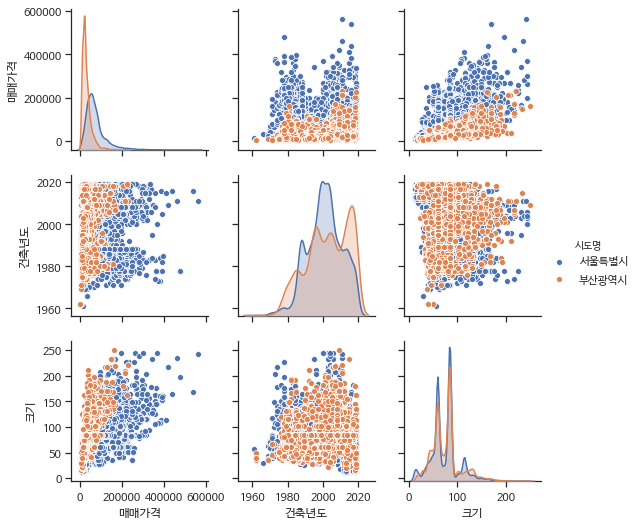

In [39]:
sns.set(style="ticks")
tat.use_kor_font()
sns.pairplot(apt_sale[["매매가격","건축년도", "크기", "시도명"]], hue="시도명", hue_order=["서울특별시", "부산광역시"])

##### 범주형 vs 연속형

In [40]:
import pymysql
import pandas as pd

db_conf = {
    "host": "127.0.0.1",
    "user": "test",
    "password": "test11",
    "database": "finance",
}

con = pymysql.connect(**db_conf)
apt_sale = pd.read_sql("SELECT * FROM APT_SALE WHERE YM>=201910 AND YM<=201912", con)
con.close()

In [41]:
apt_sale.columns=["매매가격","건축년도","년","월","일","동","아파트명","크기","지번","코드","층","년월","id","시간"]

In [42]:
import numpy as np
label = ["10평미만", "10평대","20평대", "30평대", "40평대", "50평대", "60평대", "60평대 이상"]
apt_sale["평수"] = apt_sale["크기"]/3.3
apt_sale["평수구분"] = pd.cut(apt_sale["평수"], [0,10, 20, 30,40,50, 60,70,np.Inf], labels=label)

In [43]:
ji_code = pd.read_excel("./data/KIKcd_B.20181210.xlsx")
ji_code["코드"] = ji_code["법정동코드"].astype(str).str[0:5]
ji_code_nodup = ji_code[["코드","시도명"]].drop_duplicates()
apt_sale = pd.merge(apt_sale, ji_code_nodup, on="코드", how="left")

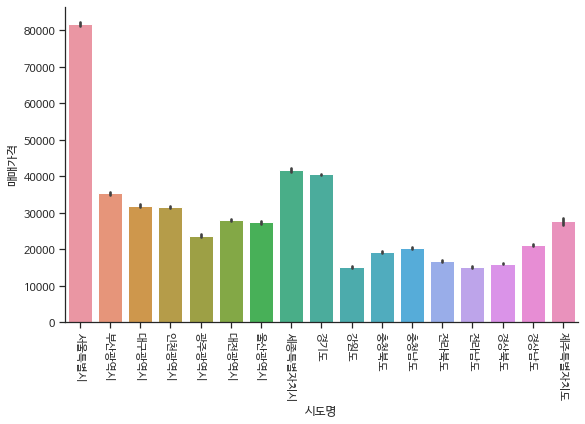

In [44]:
tat.xticks(-90)
sns.barplot(x="시도명",y="매매가격", data=apt_sale)

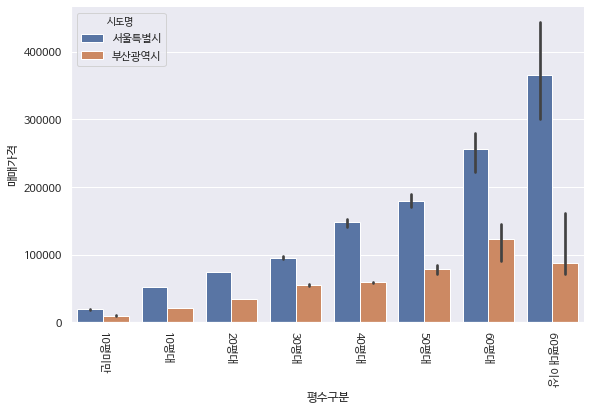

In [45]:
tat.xticks(-90)
import numpy as np
sns.barplot(x="평수구분",y="매매가격",hue="시도명",hue_order=["서울특별시", "부산광역시"], data=apt_sale, estimator=np.median)

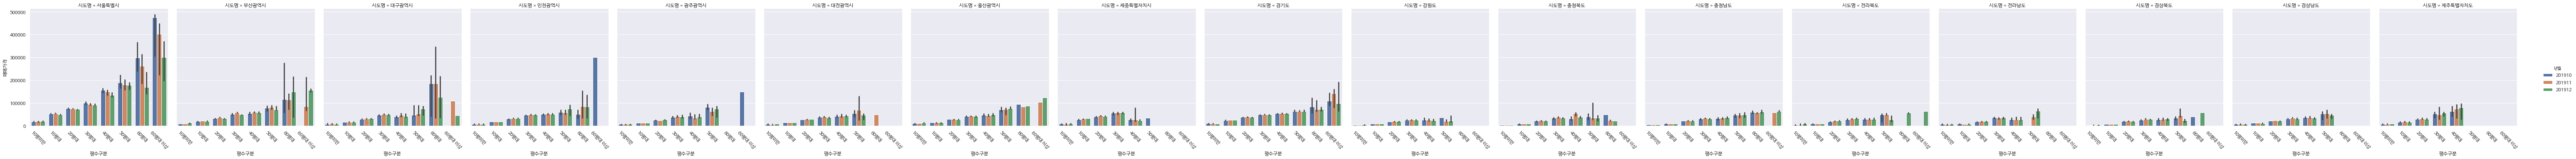

In [46]:
chart = sns.catplot(x="평수구분",y="매매가격",col="시도명", hue="년월", 
            kind="bar", data=apt_sale, estimator=np.median)
chart.set_xticklabels(rotation=-45)

#### 회귀 분석

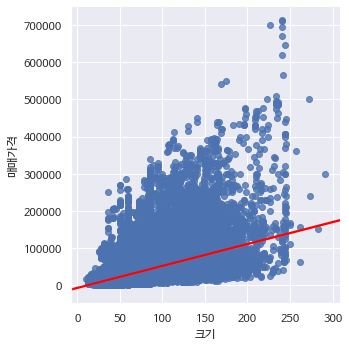

In [49]:
sns.set_context("notebook")
sns.lmplot(x="크기", y="매매가격", data=apt_sale, line_kws={'color':'red'})

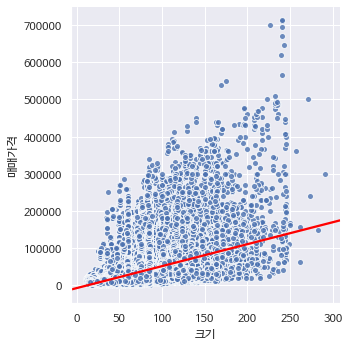

In [52]:
sns.lmplot(x="크기", y="매매가격", data=apt_sale, line_kws={'color':"red"}, 
scatter_kws={'edgecolor':"white"}, x_jitter=.9)

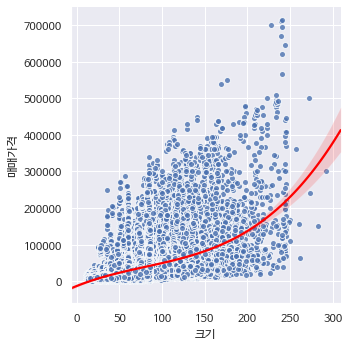

In [53]:
sns.lmplot(x="크기", y="매매가격", data=apt_sale, line_kws={'color':"red"},
           order=3, scatter_kws={'edgecolor':"white"}, x_jitter=.9)

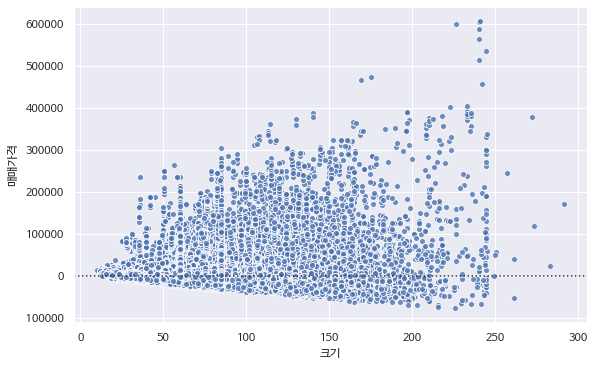

In [54]:
sns.residplot(x="크기", y="매매가격", data=apt_sale,
          robust=True, scatter_kws={'edgecolor':"white"})

#### interact 모듈 사용하기

In [55]:
import pymysql
import pandas as pd

db_conf = {
    "host": "127.0.0.1",
    "user": "test",
    "password": "test11",
    "database": "finance",
}

con = pymysql.connect(**db_conf)
stock_df = pd.read_sql("SELECT * FROM STOCK_DATA WHERE SYMBOL IN ('005930','009150')", con)
con.close()

/Users/open/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


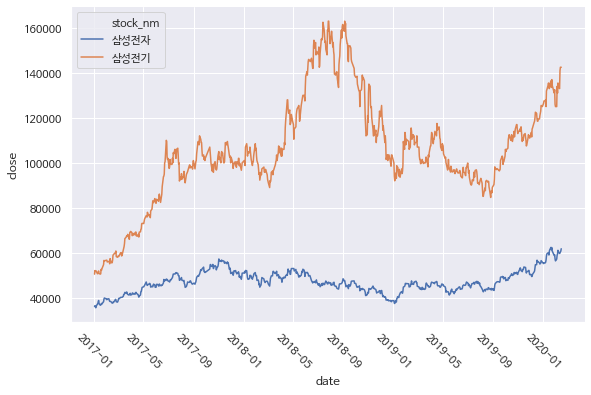

In [56]:
stock_df["date"] = stock_df["date"].astype("datetime64")
stock_df["stock_nm"]="삼성전기"
stock_df.loc[stock_df["symbol"]=="005930", "stock_nm"]="삼성전자"
tat.xticks()
sns.lineplot(x="date",y="close", hue="stock_nm", data=stock_df)

In [57]:
stock_df.head()

,date,open,high,low,close,volume,change_rate,symbol,collected_time,stock_nm
0,2017-01-02,35980,36240,35880,36100,93012,0.001665,005930,2020-02-15 06:50:34,삼성전자
1,2017-01-02,50400,50800,49850,50500,264982,-0.005906,009150,2020-02-15 06:53:08,삼성전기
2,2017-01-03,36280,36620,36020,36480,147153,0.010526,005930,2020-02-15 06:50:34,삼성전자
3,2017-01-03,51000,52300,50800,52100,545167,0.031683,009150,2020-02-15 06:53:08,삼성전기
4,2017-01-04,36500,36520,36100,36160,159435,-0.008772,005930,2020-02-15 06:50:34,삼성전자


In [58]:
from ipywidgets import interact
 
def draw_lineplot(col):
    tat.xticks()
    sns.lineplot(x="date", y=col, hue="stock_nm", data=stock_df)
    
col_list=["open", "high", "low", "close", "volume"]
interact(draw_lineplot,col=col_list)

interactive(children=(Dropdown(description='col', options=('open', 'high', 'low', 'close', 'volume'), value='o…

<function __main__.draw_lineplot(col)>

In [60]:
def draw_lineplot(col, code):
    tat.xticks()
    temp=stock_df.loc[stock_df["symbol"]==code]
    sns.lineplot(x="date", y=col, hue="stock_nm", data=temp)
    
col_list=["open", "high", "low", "close", "volume"]
code_list=["005930", "009150"]
interact(draw_lineplot,col=col_list, code=code_list)

interactive(children=(Dropdown(description='col', options=('open', 'high', 'low', 'close', 'volume'), value='o…

<function __main__.draw_lineplot(col, code)>